## Chapter 9 Neural Networks

- The concept of a neural network model
- Making inference from an existing neural network model
- The process of training a neural network model
- The impact of activation function, layer sizes, learning rate
- Construct a neural network model with TensorFlow

### Visualizing the Training Process

TensorFlow has a cool interactive visualization tool of neural netowrks called [*Deep Playground*](http://playground.tensorflow.org). Let's try to config a good neural network for the four classification tasks.

In [1]:
import tensorflow as tf
tf.__version__

C:\Users\ch002\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


'1.13.1'

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import tensorflow.keras as keras

### Dataset 1: Fashion MNIST

The FashionMNIST dataset which contains 70,000 grayscale images in 10 categories:

`class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']`

The images show individual articles of clothing at low resolution (28 by 28 pixels). Let's build a classifier with a neural network model.

In [4]:
# Load the dataset
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
??keras.datasets.fashion_mnist.load_data

### Explore the data
Find:
- Shape of the four numpy arrays
- Data type of the values
- Show some images from the dataset
- Check if the labels match the images

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_images.dtype

dtype('float64')

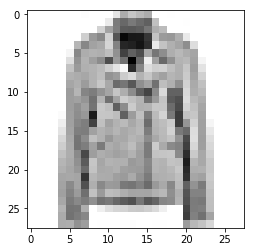

In [7]:
k = 134
plt.imshow(train_images[k], cmap=matplotlib.cm.binary)

In [8]:
train_labels[k]

4

In [9]:
class_names[train_labels[k]]

'Coat'

### Build a Neural Network Model Using Tensorflow.keras

Building the neural network requires **configuring the layers** of the model, then **compiling** the model.

**Configure the layers:**

- Use `keras.layers.Sequential()` to build the network. Specify its layers as a list. Layers may include:
- Use `keras.layers.Flatten()` as the input layer. Specify `input_shape`.
- Use `keras.layers.Dense()` as hidden layers. Specify layer size and use `tf.nn.relu` as activation function.
- Use `keras.layers.Dense()` as output layers. **What is the size of the output layer?** Use `tf.nn.softmax` as activation function.

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation=tf.nn.relu),
    keras.layers.Dense(50, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


**Compile the model:** Specify the following parameters:

- `optimizer`: The method to minimize the loss function.
- `loss`: The loss function
- `metrics`: Measurement of model performance

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train the model

Training the neural network model requires the following steps:

- Feed the training data to the model—in this example, the train_images and train_labels arrays.
- The model learns to associate images and labels.
- We ask the model to make predictions about a test set—in this example, the test_images array. We verify that the predictions match the labels from the test_labels array.

In [13]:
# use the fit() method to train the model. Specify epochs.
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 9s 145us/sample - loss: 0.5079 - acc: 0.8200
Epoch 2/5
60000/60000 [==============================] - 8s 134us/sample - loss: 0.3767 - acc: 0.8640
Epoch 3/5
60000/60000 [==============================] - 8s 139us/sample - loss: 0.3385 - acc: 0.8752
Epoch 4/5
60000/60000 [==============================] - 8s 134us/sample - loss: 0.3169 - acc: 0.8810
Epoch 5/5
60000/60000 [==============================] - 8s 140us/sample - loss: 0.3006 - acc: 0.8878


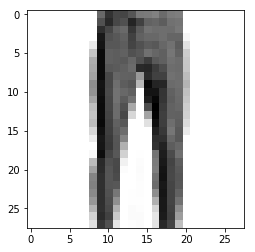

In [23]:
# Evaluate the model accuracy
ind = 4321
image = test_images[ind]
plt.imshow(image, cmap=matplotlib.cm.binary)

In [24]:
# Make predictions
probs = model.predict(test_images[ind:ind+1])
probs

array([[2.9286088e-07, 9.9999952e-01, 2.4708499e-10, 1.4548495e-07,
        1.2592198e-09, 2.5510484e-14, 9.5766346e-08, 4.9768729e-13,
        5.0105187e-11, 4.7731340e-15]], dtype=float32)

In [27]:
label = np.argmax(probs)

In [28]:
class_names[label]

'Trouser'

In [32]:
from sklearn.metrics import accuracy_score
test_probabilities = model.predict(test_images)
test_predictions = np.array([np.argmax(probabilities) for probabilities in test_probabilities])
print(accuracy_score(test_labels, test_predictions))

0.8724


## Homework:

1. Given data (0, 1), calculate the input and output of each node in the neural network using in Slide 16 - 19.
2. Construct a classifier of the following dataset. Visualize the decision boundary of the model.

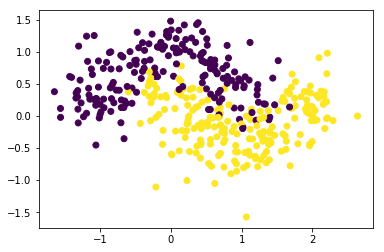

In [38]:
# Generate datasets
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import numpy as np
X, y = make_moons(n_samples=500,
                  noise=0.3)
X = np.array(X)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2)
# Plot training set
import matplotlib.pyplot as plt
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()